In [1]:
import sys
sys.path.insert(0, '../scripts/')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from plots import Plots
from datetime import datetime, timedelta
%matplotlib inline

In [3]:
pwd = os.getcwd()

train_file_path = os.path.join(pwd, os.pardir, "data/train.csv")
test_file_path = os.path.join(pwd, os.pardir, "data/test.csv")
store_file_path = os.path.join(pwd, os.pardir, "data/store.csv")


In [4]:
df_train = pd.read_csv(train_file_path, dtype={'StateHoliday': object}, parse_dates=["Date"])
df_test = pd.read_csv(test_file_path, dtype={'StateHoliday': object}, parse_dates=["Date"])
df_store = pd.read_csv(store_file_path)

In [5]:
df_train_store = pd.merge(df_train, df_store, how = 'left', on = 'Store')
df_test_store = pd.merge(df_test, df_store, how = 'left', on = 'Store')

In [6]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
df_train_store_copy = df_train_store.copy()
df_train_store_copy.set_index("Date", inplace=True)

How many stores do Rossmann Pharmaceuticals have?

In [8]:
df_train_store_copy["Store"].nunique()

1115

In [9]:
# split the date into day, month, year
df_train_store_copy["Day"] = df_train_store_copy.index.day
df_train_store_copy["Month"] = df_train_store_copy.index.month
df_train_store_copy["Year"] = df_train_store_copy.index.year

In [10]:
# setting general configurations
plt.style.use('seaborn')
# to convert the scientific notation to decimal format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.reset_option('display.float_format')

In [11]:
df_train_store_copy.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1014567.00,693861.00,693861.00,1017209.00,509178.00,509178.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18,5430.09,7.22,2008.69,0.50,23.27,2011.75,15.70,5.85,2013.83
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38,7715.32,3.21,5.99,0.50,14.10,1.66,8.79,3.33,0.78
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,1900.00,0.00,1.00,2009.00,1.00,1.00,2013.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,710.00,4.00,2006.00,0.00,13.00,2011.00,8.00,3.00,2013.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,2330.00,8.00,2010.00,1.00,22.00,2012.00,16.00,6.00,2014.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,6890.00,10.00,2013.00,1.00,37.00,2013.00,23.00,8.00,2014.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00,75860.00,12.00,2015.00,1.00,50.00,2015.00,31.00,12.00,2015.00


In [12]:
df_train_store_copy["Promo"].describe()

count   1017209.00
mean          0.38
std           0.49
min           0.00
25%           0.00
50%           0.00
75%           1.00
max           1.00
Name: Promo, dtype: float64

<AxesSubplot:title={'center':'Test set'}, ylabel='Frequency'>

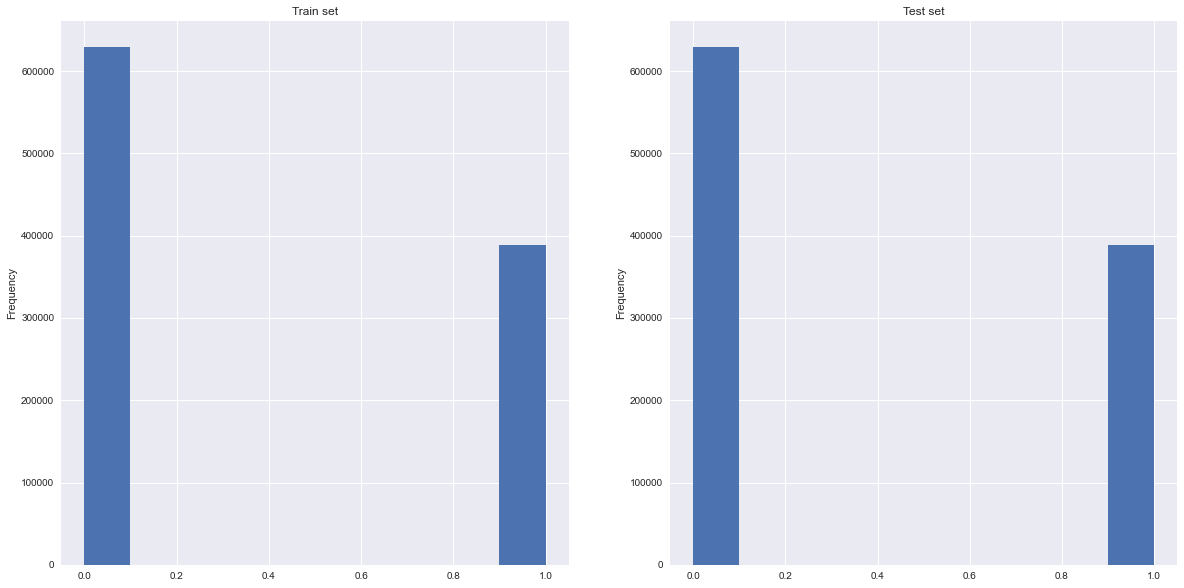

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
df_train_store["Promo"].plot(kind="hist", figsize=(20, 10), ax=ax1, title="Train set")
df_train_store["Promo"].plot(kind="hist", figsize=(20, 10), ax=ax2, title="Test set")

Both the train set and the test set have similar distribution

<AxesSubplot:title={'center':'Train set'}, ylabel='Frequency'>

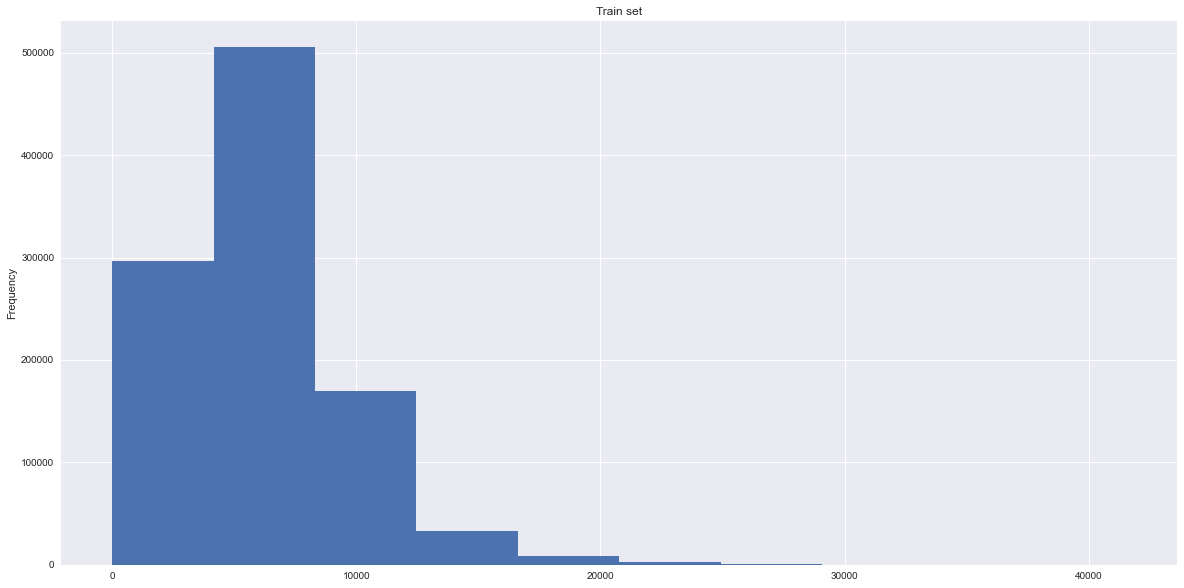

In [14]:
fig, axis = plt.subplots(figsize=(20, 10))
df_train_store_copy["Sales"].plot(kind="hist", figsize=(20, 10), ax=axis, title="Train set")

Distribution of sales in the training dataset

In [15]:
sales_during_holiday = df_train_store_copy.loc[(df_train_store_copy["StateHoliday"] == "a")]

<AxesSubplot:xlabel='Date'>

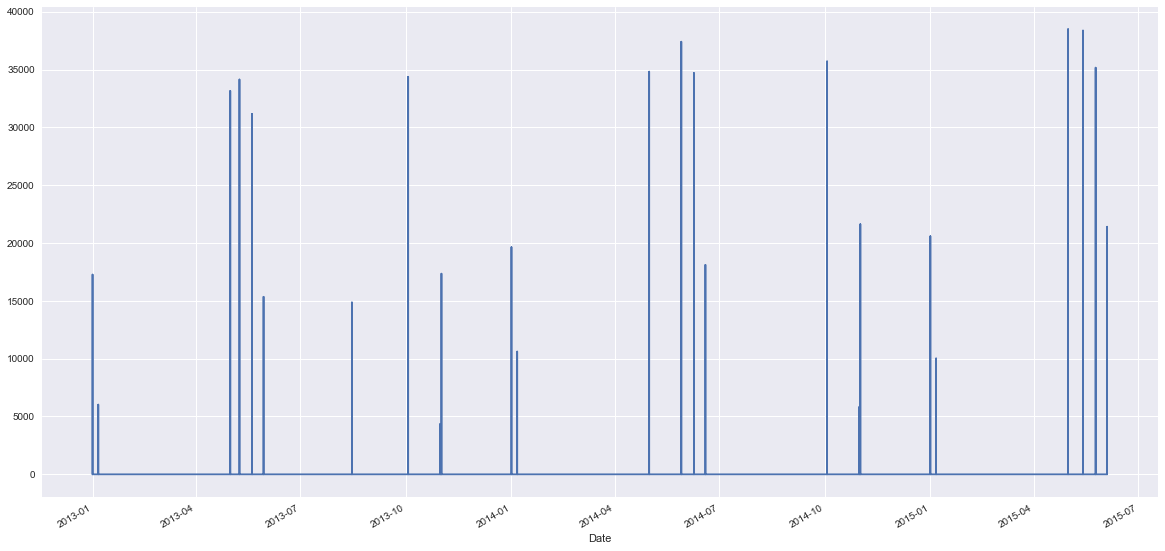

In [16]:
sales_during_holiday["Sales"].plot(figsize=(20, 10))

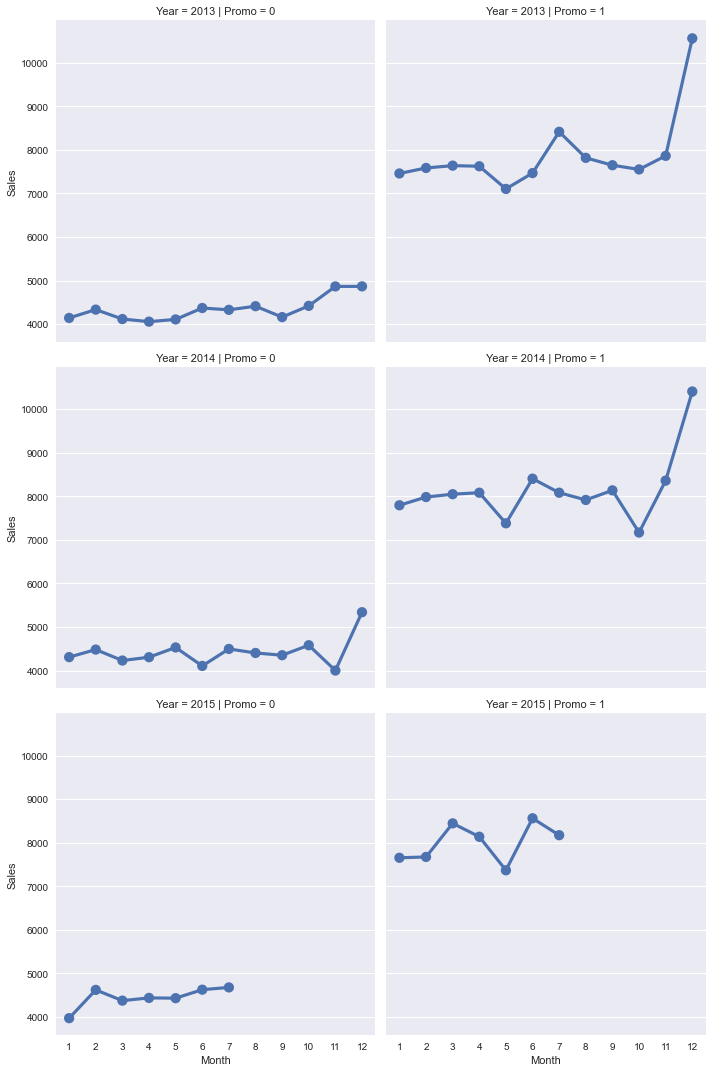

In [17]:
sns.catplot(kind="point", data = df_train_store_copy, x ="Month", y = "Sales", 
               col = 'Promo',
               row = "Year")

We can see that running promotions affected our Sales positively every year

In [166]:
seasonal_purchases = df_train_store_copy.loc[(df_train_store_copy["StateHoliday"] != "0") & (df_train_store_copy["StateHoliday"] != "a")]

In [168]:
seasonal_purchases.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
Date,,,,,,,,,,,,,,,,,,,,
2015-04-06,1,1,0,0,0,0,b,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN,6,4,2015
2015-04-06,2,1,0,0,0,0,b,1,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct",6,4,2015
2015-04-06,3,1,0,0,0,0,b,1,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct",6,4,2015
2015-04-06,4,1,0,0,0,0,b,1,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN,6,4,2015
2015-04-06,5,1,0,0,0,0,b,1,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN,6,4,2015


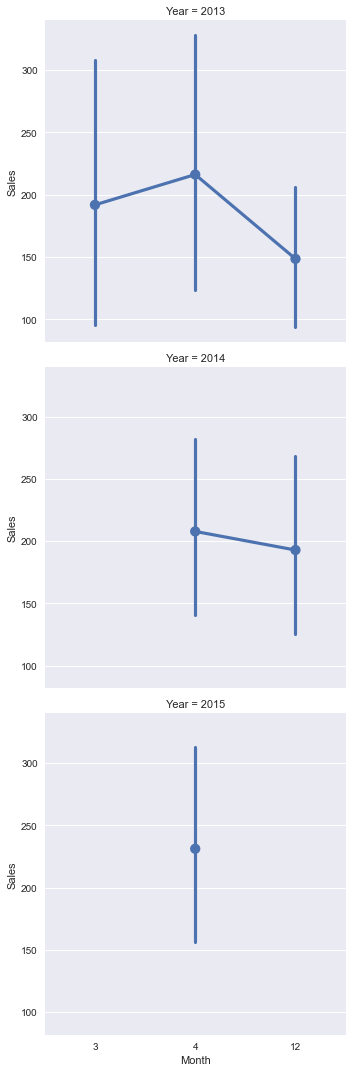

In [174]:
sns.catplot(kind="point", data = seasonal_purchases, x ="Month", y = "Sales", row = "Year")

In [175]:
df_train_store_copy[["Sales", "Customers"]].corr()

,Sales,Customers
Sales,1.00,0.89
Customers,0.89,1.00


<AxesSubplot:>

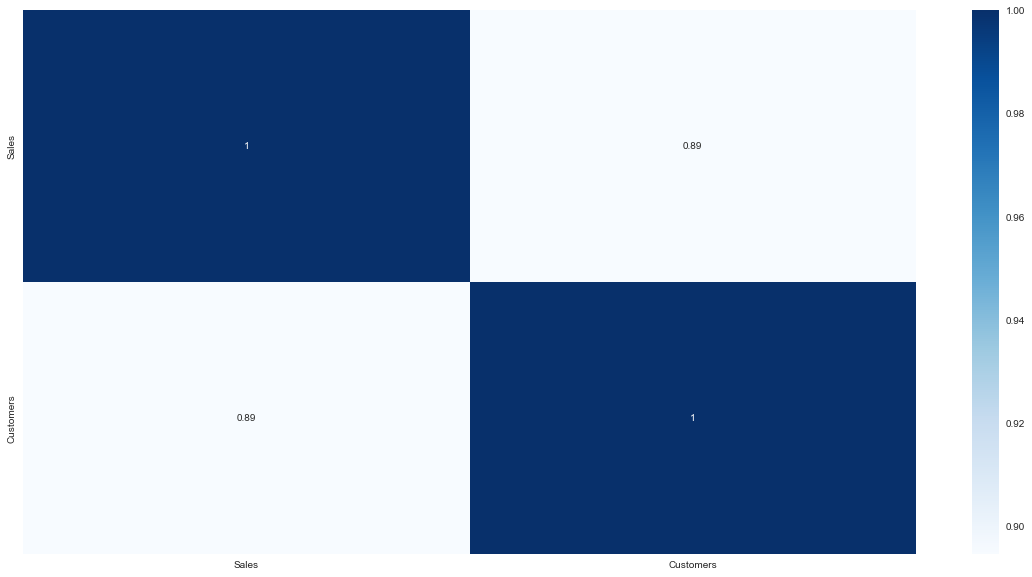

In [176]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data=df_train_store_copy[["Sales", "Customers"]].corr(), cmap="Blues", ax=ax, annot=True)

Sales and Number of customers are highly correlated as expected

In [19]:
def calculatePreviousDay(row):
    date_object = datetime(row["Year"], row["Month"], row["Day"]) - timedelta(1)
    return date_object.day

def calculatePreviousMonth(row):
    date_object = datetime(row["Year"], row["Month"], row["Day"]) - timedelta(1)
    return date_object.month

def calculatePreviousYear(row):
    date_object = datetime(row["Year"], row["Month"], row["Day"]) - timedelta(1)
    return date_object.year

In [188]:
df_train["Previous Day"] = df_train.apply(calculatePreviousDay, axis=1)

In [189]:
df_train["Previous Month"] = df_train.apply(calculatePreviousMonth, axis=1)

In [190]:
df_train["Previous Year"] = df_train.apply(calculatePreviousYear, axis=1)

In [191]:
df_train.loc[df_train["StateHoliday"] == "a"][["Sales", "Previous Day", "Previous Month", "Previous Year"]]

,Sales,Previous Day,Previous Month,Previous Year
63555,0,3,6,2015
63557,0,3,6,2015
63559,5807,3,6,2015
63560,5749,3,6,2015
63563,0,3,6,2015
...,...,...,...,...
1017204,0,31,12,2012
1017205,0,31,12,2012
1017206,0,31,12,2012
1017207,0,31,12,2012


In [193]:
df_train.loc[(df_train["StateHoliday"] == "b") | (df_train["StateHoliday"] == "c")]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,Previous Day,Previous Month,Previous Year
129340,1,1,2015-04-06,0,0,0,0,b,1,6,4,2015,5,4,2015
129341,2,1,2015-04-06,0,0,0,0,b,1,6,4,2015,5,4,2015
129342,3,1,2015-04-06,0,0,0,0,b,1,6,4,2015,5,4,2015
129343,4,1,2015-04-06,0,0,0,0,b,1,6,4,2015,5,4,2015
129344,5,1,2015-04-06,0,0,0,0,b,1,6,4,2015,5,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920200,1111,5,2013-03-29,0,0,0,1,b,1,29,3,2013,28,3,2013
920201,1112,5,2013-03-29,0,0,0,1,b,1,29,3,2013,28,3,2013
920202,1113,5,2013-03-29,0,0,0,1,b,1,29,3,2013,28,3,2013
920203,1114,5,2013-03-29,0,0,0,1,b,0,29,3,2013,28,3,2013


<AxesSubplot:xlabel='Date'>

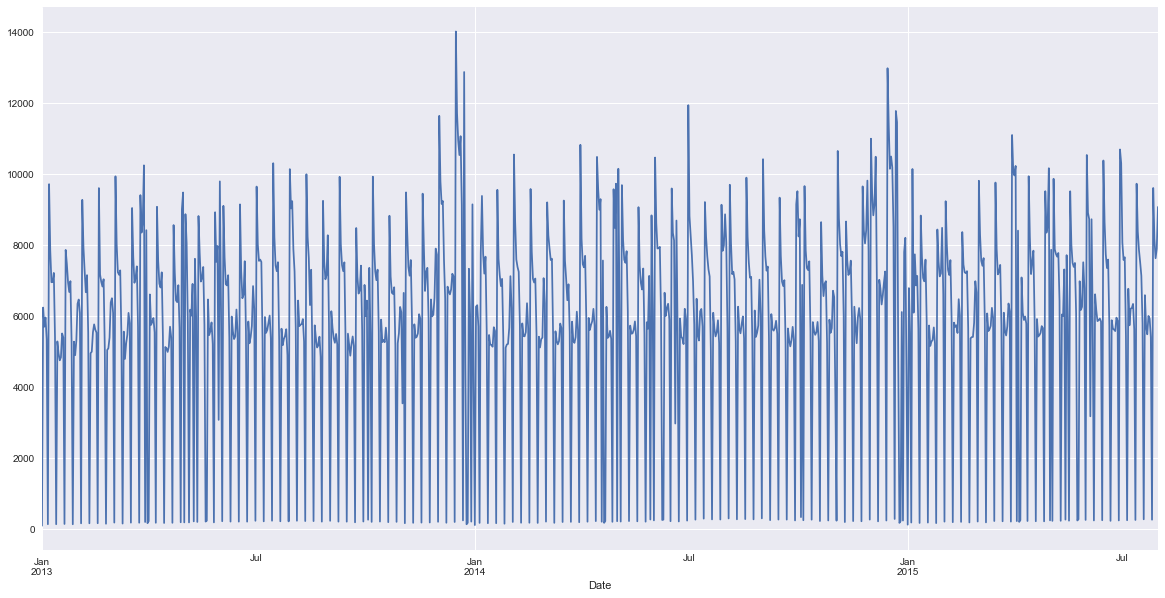

In [177]:
df_train_store_copy["Sales"].resample('D').mean().plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

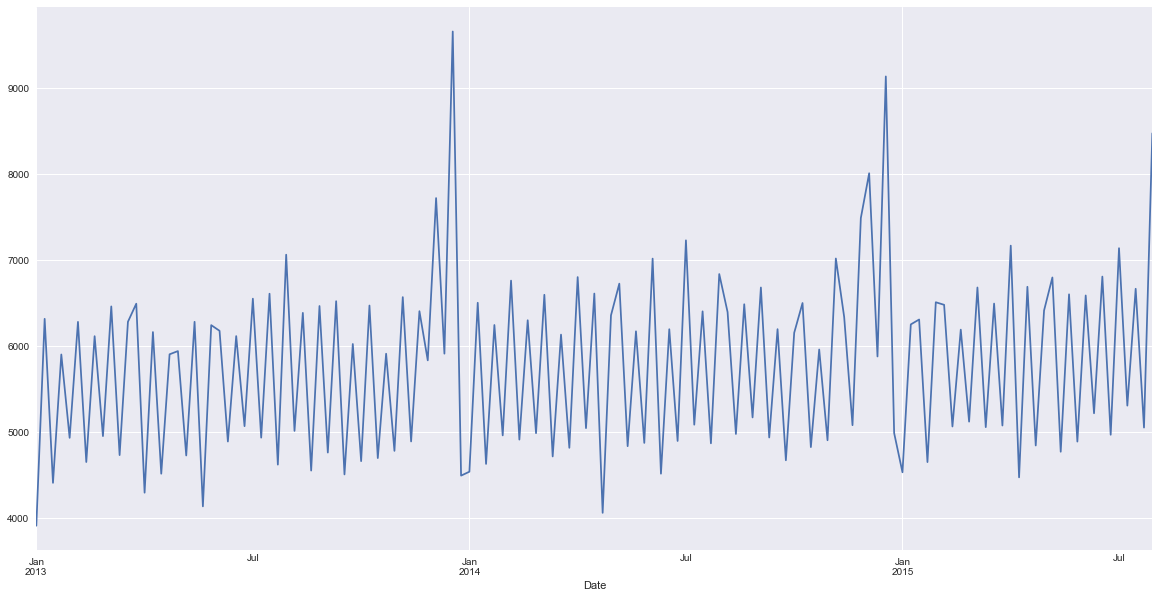

In [179]:
df_train_store_copy["Sales"].resample('W').mean().plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

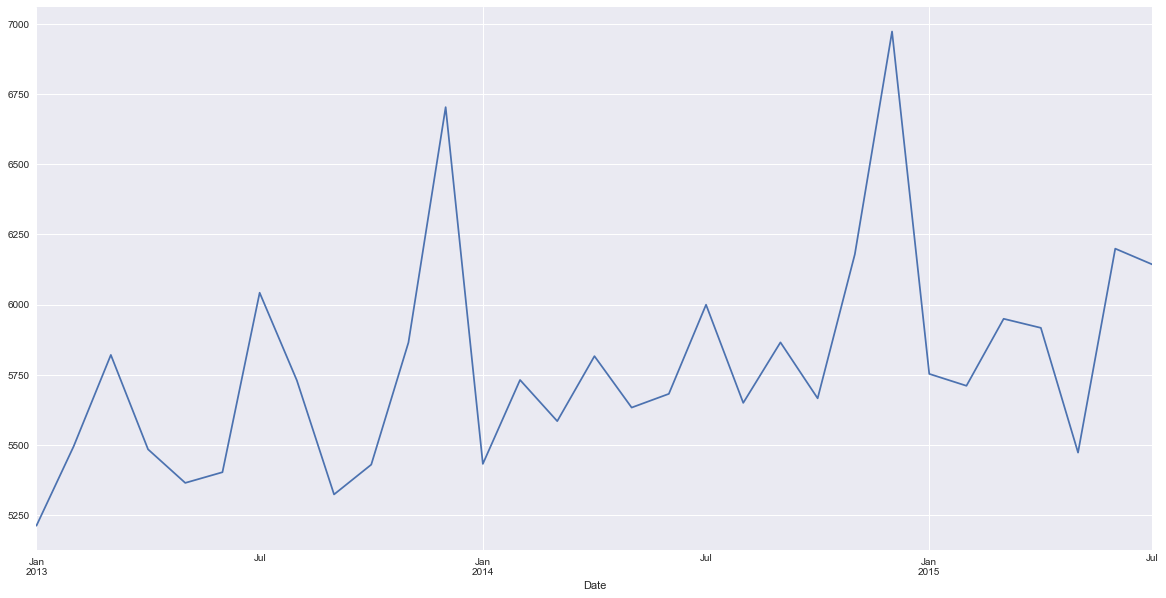

In [178]:
df_train_store_copy["Sales"].resample('M').mean().plot(figsize=(20, 10))

Missing percentages of data

In [182]:
df_train_store_copy.count()/df_train_store_copy.shape[0] * 100

Store                       100.00
DayOfWeek                   100.00
Sales                       100.00
Customers                   100.00
Open                        100.00
Promo                       100.00
StateHoliday                100.00
SchoolHoliday               100.00
StoreType                   100.00
Assortment                  100.00
CompetitionDistance          99.74
CompetitionOpenSinceMonth    68.21
CompetitionOpenSinceYear     68.21
Promo2                      100.00
Promo2SinceWeek              50.06
Promo2SinceYear              50.06
PromoInterval                50.06
Day                         100.00
Month                       100.00
Year                        100.00
dtype: float64

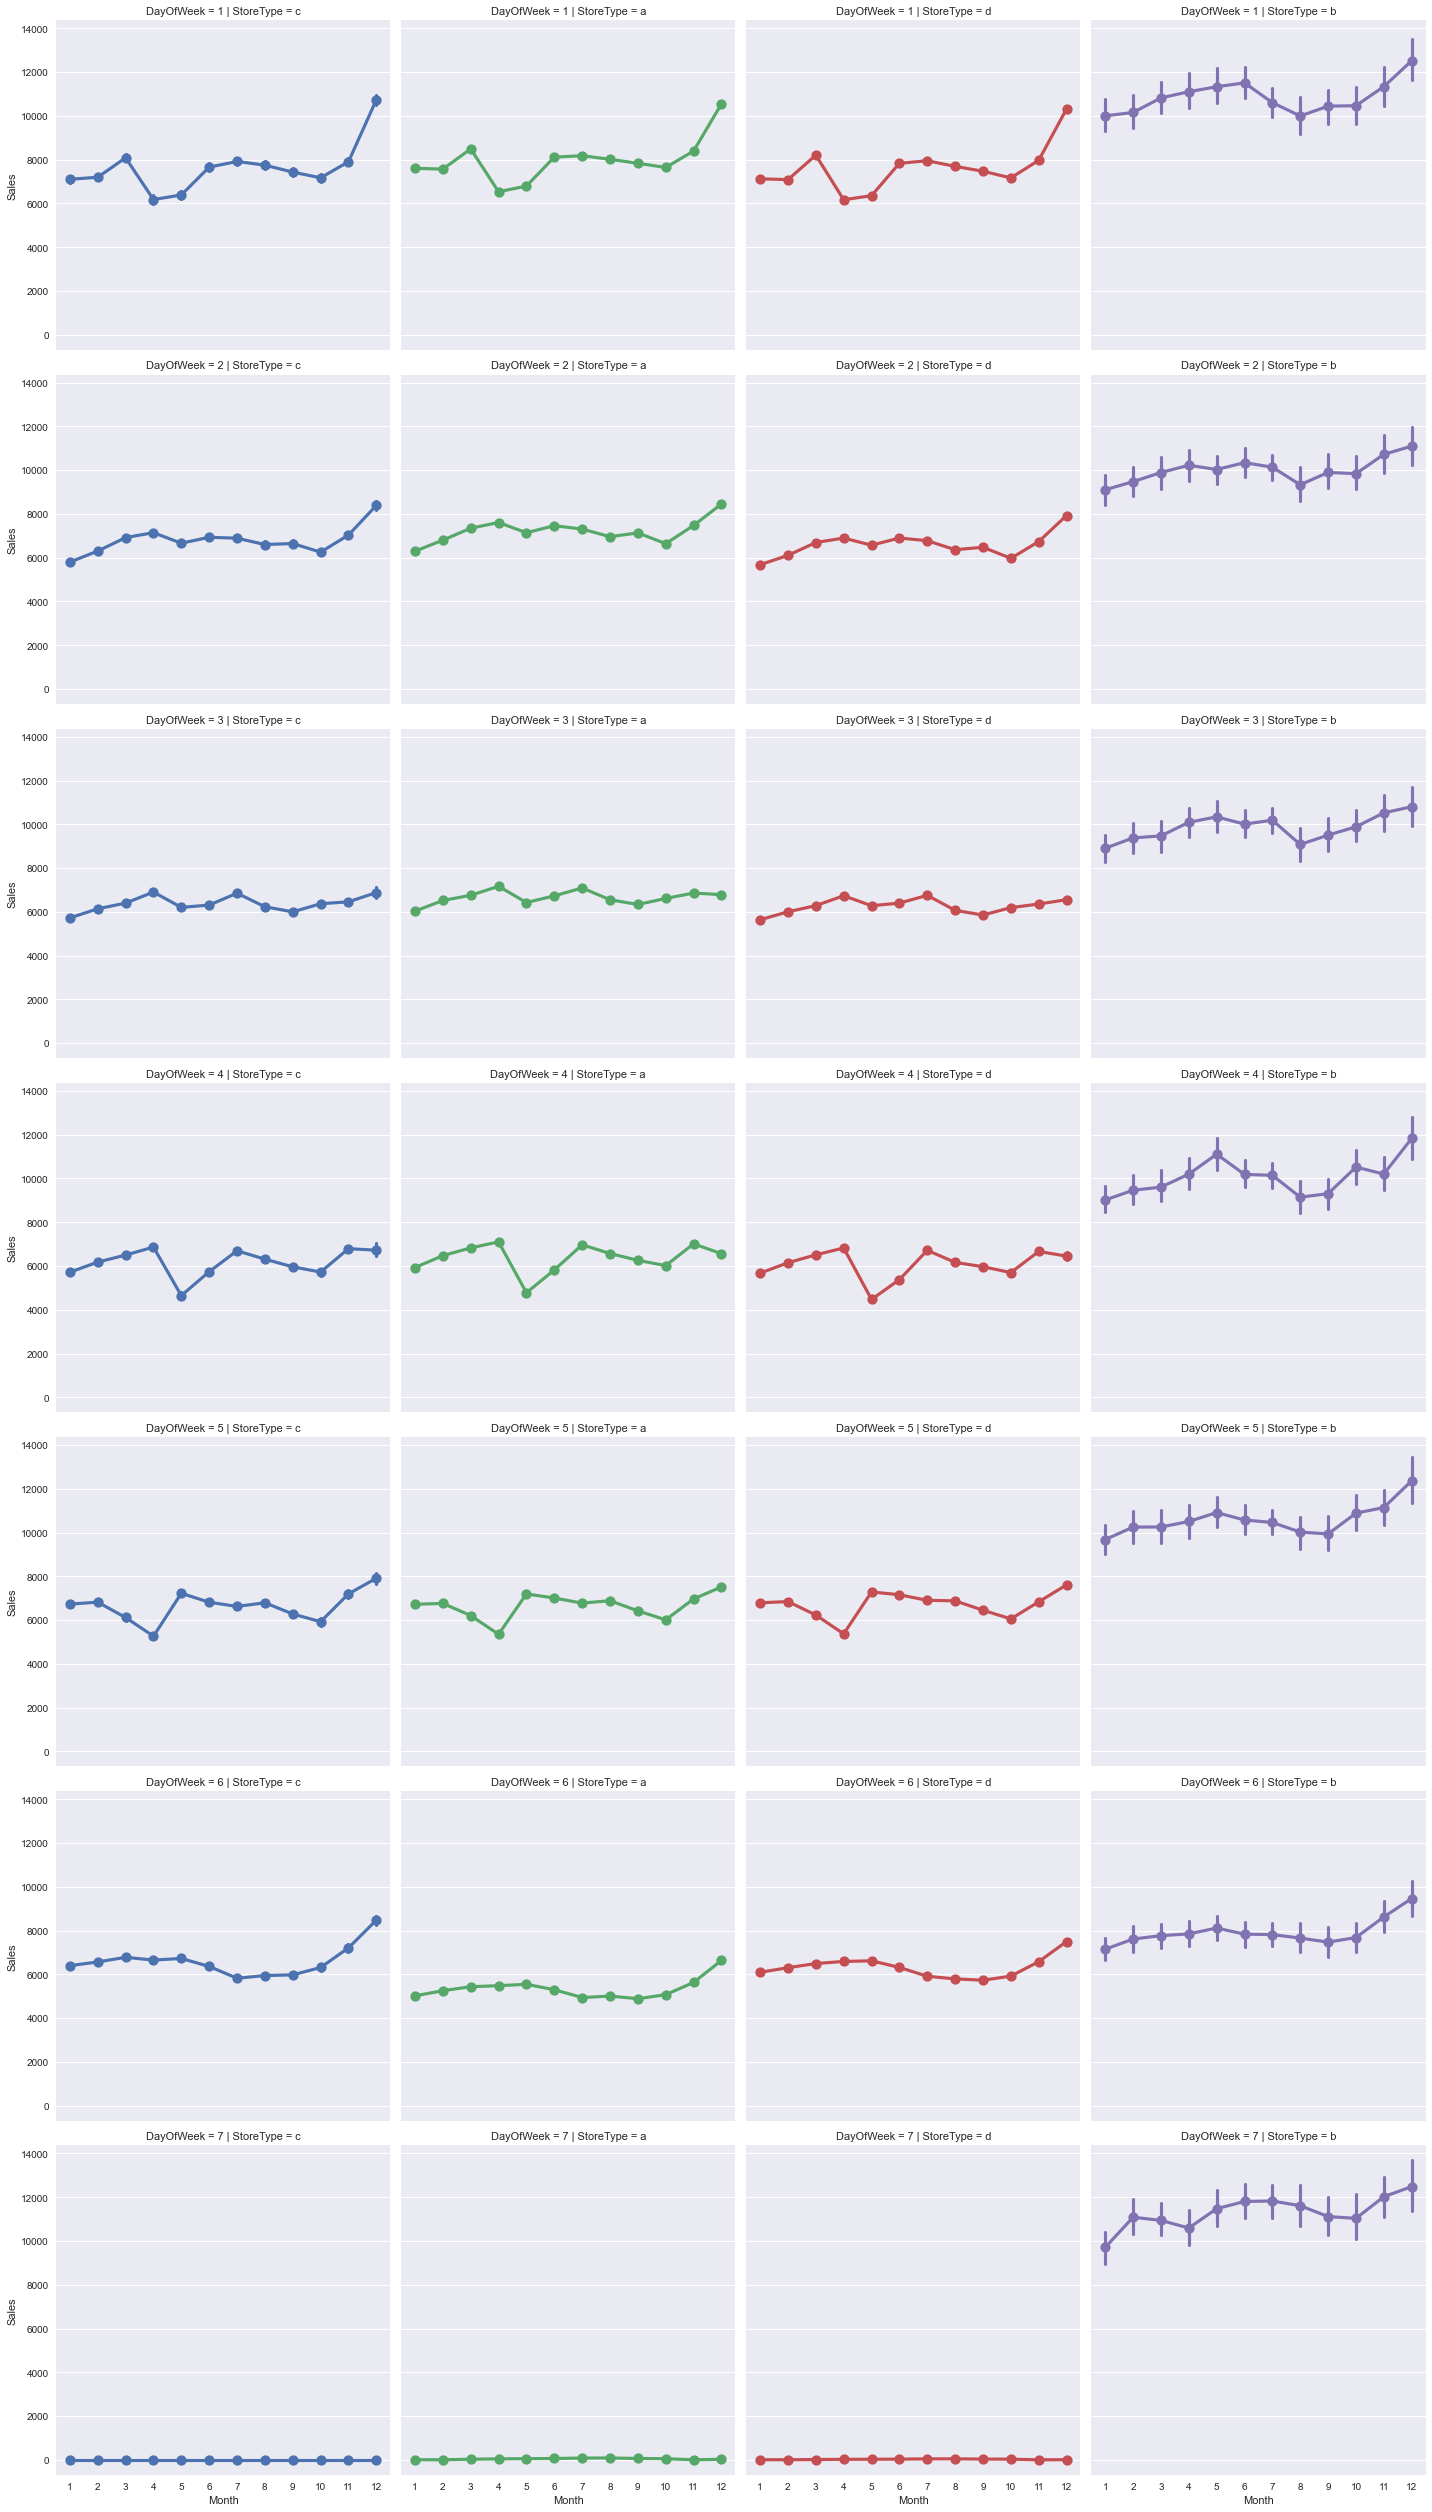

In [20]:
sns.catplot(kind="point", data = df_train_store_copy, x = 'Month', y = "Sales", 
               col = 'StoreType', 
               hue = 'StoreType',
               row = 'DayOfWeek',
               )

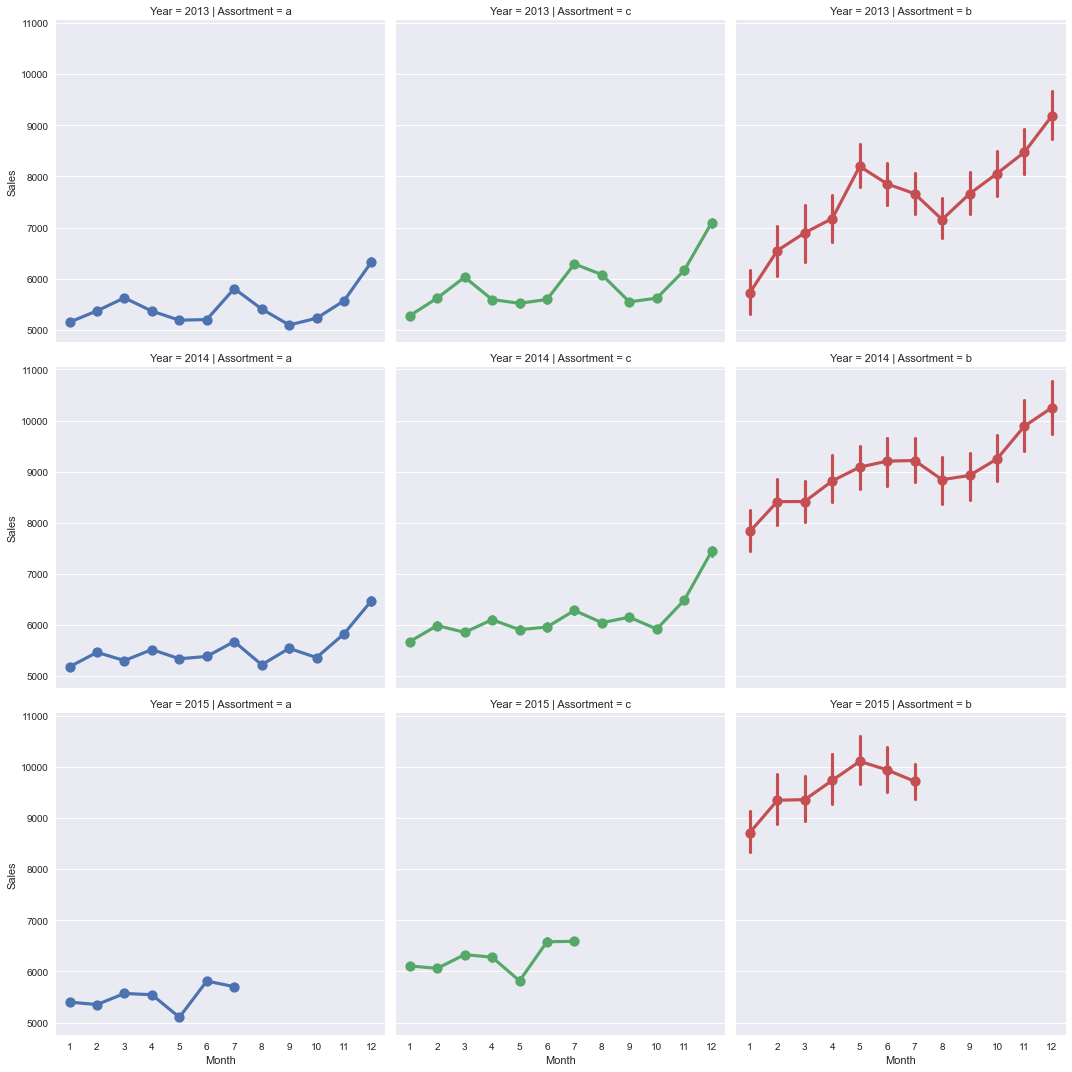

In [21]:
sns.catplot(kind="point", data = df_train_store_copy, x = 'Month', y = "Sales", 
               col = 'Assortment', 
               hue = 'Assortment',
               row = 'Year',
               )